In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('uber-raw-data-sep14.csv')

In [3]:
data.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [4]:
data.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [ ]:
#Let's Start EDA

In [ ]:
#Find most popular days of Uber trip

  Day of Week  Number of Trips
0     Tuesday           163230
1    Saturday           162057
2      Friday           160380
3    Thursday           153276
4      Monday           137288
5   Wednesday           135373
6      Sunday           116532


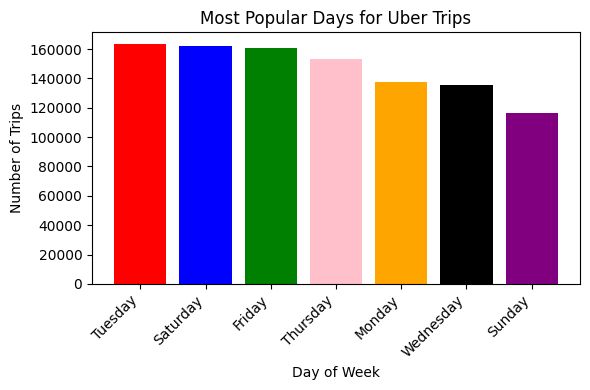

In [5]:
data["Date/Time"] = pd.to_datetime(data["Date/Time"])

data["Day of Week"] =data["Date/Time"].dt.day_name()

popular_days =data["Day of Week"].value_counts().reset_index()
popular_days.columns = ["Day of Week", "Number of Trips"]

popular_days = popular_days.sort_values(by="Number of Trips", ascending=False)

bar_colors = ["red", "blue", "green", "pink", "orange", "black", "purple"]

print(popular_days)

plt.figure(figsize=(6,4))
plt.bar(popular_days["Day of Week"], popular_days["Number of Trips"], color=bar_colors)
plt.xlabel("Day of Week")
plt.ylabel("Number of Trips")
plt.title("Most Popular Days for Uber Trips")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
#Number of Trips for each Base 

     Base  Number of Trips
0  B02617           377695
1  B02598           240600
2  B02682           197138
3  B02764           178333
4  B02512            34370


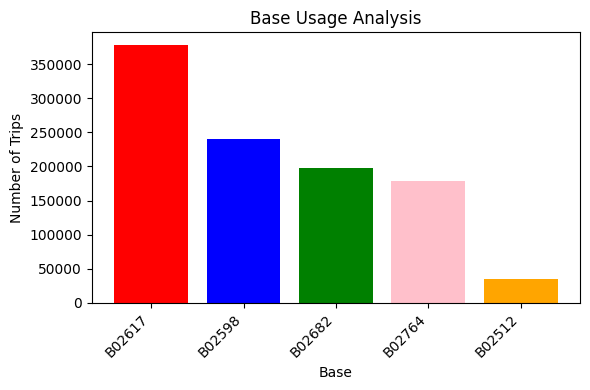

In [6]:
base_usage = data["Base"].value_counts().reset_index()
base_usage.columns = ["Base", "Number of Trips"]

# Sort the bases based on the number of trips (descending order)
base_usage = base_usage.sort_values(by="Number of Trips", ascending=False)

# Print the base usage analysis
print(base_usage)
bar_colors = ["red", "blue", "green", "pink", "orange"]
# Create a bar plot to visualize the base usage
plt.figure(figsize=(6,4))
plt.bar(base_usage["Base"], base_usage["Number of Trips"], color=bar_colors)
plt.xlabel("Base")
plt.ylabel("Number of Trips")
plt.title("Base Usage Analysis")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
#let’s prepare the data to analyze the Uber trips according to days and hours:

In [9]:
data["Day"] = data["Date/Time"].apply(lambda x: x.day)
data["Weekday"] = data["Date/Time"].apply(lambda x: x.weekday())
data["Hour"] = data["Date/Time"].apply(lambda x: x.hour)
print(data.head())

            Date/Time      Lat      Lon    Base Day of Week  Day  Weekday  \
0 2014-09-01 00:01:00  40.2201 -74.0021  B02512      Monday    1        0   
1 2014-09-01 00:01:00  40.7500 -74.0027  B02512      Monday    1        0   
2 2014-09-01 00:03:00  40.7559 -73.9864  B02512      Monday    1        0   
3 2014-09-01 00:06:00  40.7450 -73.9889  B02512      Monday    1        0   
4 2014-09-01 00:11:00  40.8145 -73.9444  B02512      Monday    1        0   

   Hour  
0     0  
1     0  
2     0  
3     0  
4     0  


In [ ]:
# Analyze Each day to see on which day the Uber trips were highest

<Axes: xlabel='Day', ylabel='Density'>

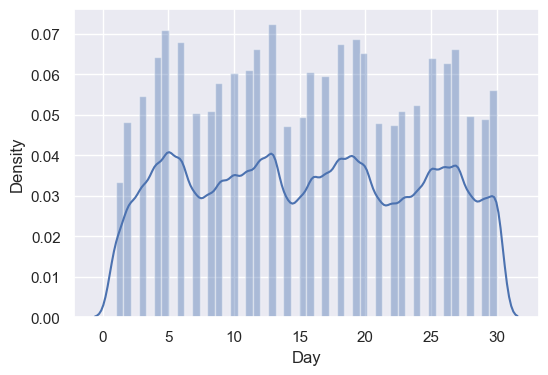

In [14]:
sns.set(rc={'figure.figsize':(6, 4)})
sns.distplot(data["Day"])

In [ ]:
# By looking at the daily trips we can say that the Uber trips are rising on the working days and decreases on the weekends. 
Now let’s analyze the Uber trips according to the hours

<Axes: xlabel='Hour', ylabel='Density'>

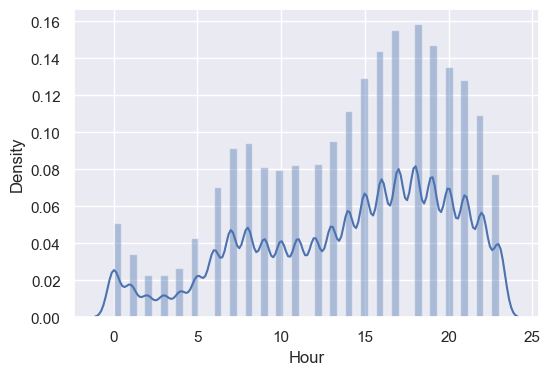

In [15]:
sns.distplot(data["Hour"])

In [ ]:
# According to the hourly data, the Uber trips decreases after midnight and then start increasing after 5 am and the trips keep
rising till 6 pm such that 6 pm is the busiest hour for Uber then the trips start decreasing. Now let’s analyze the Uber trips 
according to the weekdays.

<Axes: xlabel='Weekday', ylabel='Density'>

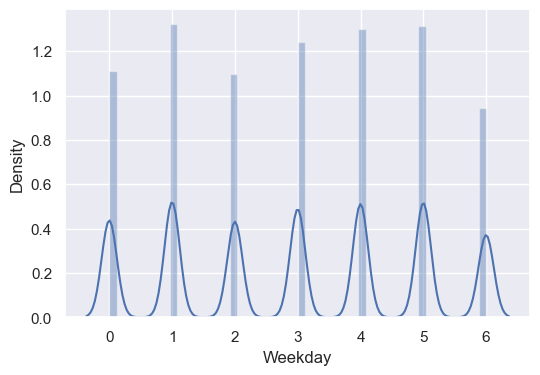

In [16]:
sns.distplot(data["Weekday"])

In [ ]:
# In the above figure 0 indicates Sunday, on Sundays the Uber trips and more than Saturdays so we can say people also use Uber
for outings rather than for just going to work.On Saturdays, the Uber trips are the lowest and on Mondays, they are the highest.
Now let’s have a look at the correlation of hours and weekdays on the Uber trips

<Axes: xlabel='Hour', ylabel='Weekday'>

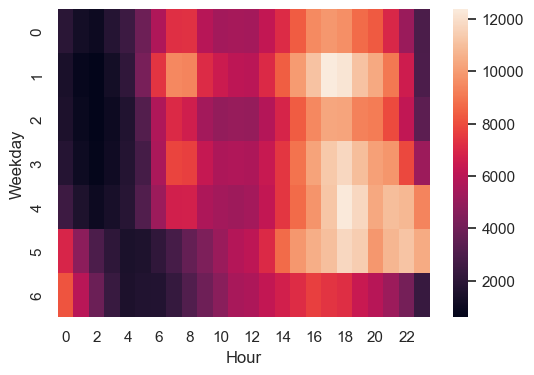

In [17]:
df = data.groupby(["Weekday", "Hour"]).apply(lambda x: len(x))
df = df.unstack()
sns.heatmap(df, annot=False)

In [ ]:
# As we are having the data about longitude and latitude so we can also plot the density of Uber trips according to the regions

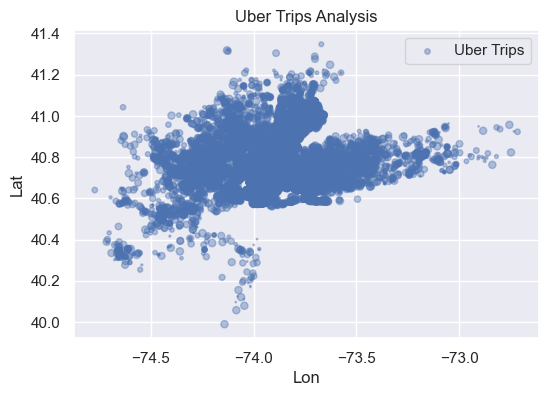

In [19]:
data.plot(kind='scatter', x='Lon', y='Lat', alpha=0.4, s=data['Day'], label='Uber Trips',
figsize=(6, 4))
plt.title("Uber Trips Analysis")
plt.legend()
plt.show()

# SUMMARY 

In [ ]:

# Some of the conclusions that I got from this analysis are:

Most popular day for uber trips is monday
Base B02617 has the highest number of trips 
Monday is the most profitable day for Uber.
On Saturdays less number of people use Uber.
6 pm is the busiest day for Uber.
On average a rise in Uber trips start around 5 am.
Most of the Uber trips originate near the Manhattan region in New York.